In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 12})


In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/frd_dmin.nc'
dataset = nc.Dataset(filename)



In [3]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source_of_Data: United States Geological Survey (USGS)
    Station_Name: Fredericksburg
    IAGA_CODE: FRD
    Latitude: 38.2047
    Longitude: -77.3729
    Elevation: 69
    Sensor_Orientation: HDZF
    Digital_Sampling: 100.0 second
    Data_Interval_Type: filtered 1-minute (00:15-01:45)
    Data_Type: Definitive
    url: https://geomag.usgs.gov/monitoring/observatories/fredericksburg
    file_conversion_author: Greg Lucas (glucas@usgs.gov)
    dimensions(sizes): Time(17955800)
    variables(dimensions): int64 Time(Time), float64 X(Time), float64 Y(Time), float64 Z(Time)
    groups: 


In [4]:
for dim in dataset.dimensions.values():
    print(dim)
for var in dataset.variables.values():
    print(var)



<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 17955800
<class 'netCDF4._netCDF4.Variable'>
int64 Time(Time)
    units: minutes since 1982-11-11 16:40:00
    calendar: proleptic_gregorian
unlimited dimensions: Time
current shape = (17955800,)
filling on, default _FillValue of -9223372036854775806 used
<class 'netCDF4._netCDF4.Variable'>
float64 X(Time)
    _FillValue: nan
    description: X-component (Geographic North) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (17955800,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Y(Time)
    _FillValue: nan
    description: Y-component (Geographic East) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (17955800,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Z(Time)
    _FillValue: nan
    description: Z-component (Geographic Down [-r]) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (17955800,)
filling on


In [5]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [6]:
df.head()

,Time,X,Y,Z
0,1982-11-11 16:40:00,20259.346679,-3091.069485,51083.4
1,1982-11-11 16:41:00,20259.247824,-3091.054402,51083.3
2,1982-11-11 16:42:00,20260.443022,-3091.839834,51083.2
3,1982-11-11 16:43:00,20260.335239,-3091.220314,51083.1
4,1982-11-11 16:44:00,20260.524007,-3090.646044,51082.9


Text(0, 0.5, 'X-component of magnetic field')

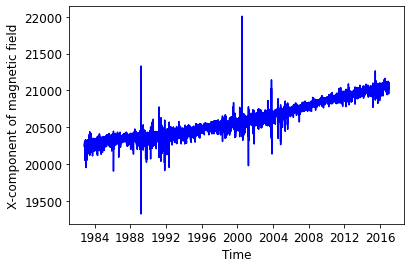

In [7]:
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

In [8]:
## Anomalies between 1988-1990, 2000-2002

In [9]:
df['Time_Diff'] = df['Time'].diff()
df['Time_Diff'].max()

Timedelta('0 days 00:01:00')

In [10]:
for col in df.columns.to_list():
    print(col, df[col].isna().sum())

Time 0
X 481802
Y 481802
Z 515614
Time_Diff 1


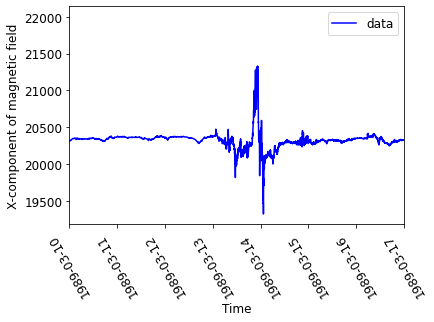

In [11]:
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')


plt.xlim([datetime.date(1989, 3, 10), datetime.date(1989, 3, 17)])
plt.xticks(rotation=120)
plt.legend()

In [12]:
## Anomly 1989-03-13---1989-03-15.   Realted to the Quebec outage? This data is in Virgina, Parrell to Quebec. 

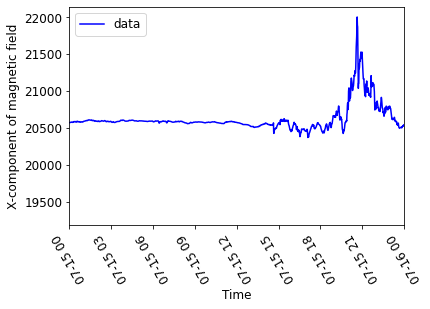

In [13]:
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')


plt.xlim([datetime.date(2000, 7, 15), datetime.date(2000, 7, 16)])
plt.xticks(rotation=120)
plt.legend()

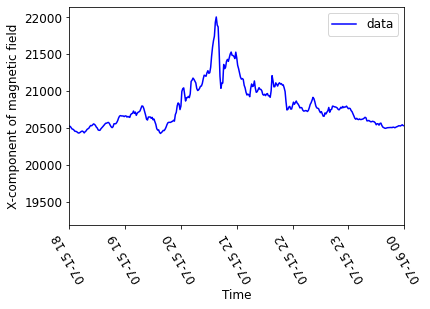

In [14]:
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')


plt.xlim([datetime.datetime(2000, 7, 15, 18), datetime.datetime(2000, 7, 16, 00)])
plt.xticks(rotation=120)
plt.legend()

In [15]:
## CME occured on July, 14 2000. Correlates to France's Bastille Day solar storm. Fits into the 11 year solar cycle of CME's.

In [16]:
df_2000 = df[df['Time'] < pd.Timestamp(2000, 12, 31)]
inds_2000 = list(pd.isnull(df_2000['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_2000 = len(inds_2000) # number of NaNs in the X component
print(inds_len_2000)

389530


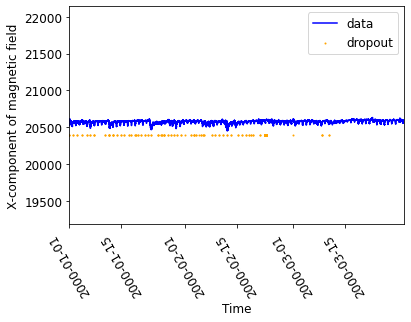

In [17]:
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')


plt.scatter(df_2000['Time'][inds_2000], [20400]*inds_len_2000, color='orange', label='dropout', s=1)

plt.xlim([datetime.date(2000, 1, 1), datetime.date(2000, 3, 31)])
plt.xticks(rotation=120)
plt.legend()

In [18]:
nan_free = (df.fillna({'Z': np.round(np.mean(df['Z']), 2), 'Y': np.round(np.mean(df['Y']), 2), 'X': np.round(np.mean(df['X']),2)}))
print(nan_free)

                        Time             X            Y        Z  \
0        1982-11-11 16:40:00  20259.346679 -3091.069485  51083.4   
1        1982-11-11 16:41:00  20259.247824 -3091.054402  51083.3   
2        1982-11-11 16:42:00  20260.443022 -3091.839834  51083.2   
3        1982-11-11 16:43:00  20260.335239 -3091.220314  51083.1   
4        1982-11-11 16:44:00  20260.524007 -3090.646044  51082.9   
...                      ...           ...          ...      ...   
17955795 2016-12-31 23:55:00  21071.000000 -3926.500000  46418.7   
17955796 2016-12-31 23:56:00  21071.400000 -3926.700000  46418.6   
17955797 2016-12-31 23:57:00  21072.600000 -3926.900000  46418.3   
17955798 2016-12-31 23:58:00  21073.000000 -3927.300000  46418.3   
17955799 2016-12-31 23:59:00  21073.000000 -3927.400000  46418.3   

               Time_Diff  
0                    NaT  
1        0 days 00:01:00  
2        0 days 00:01:00  
3        0 days 00:01:00  
4        0 days 00:01:00  
...                  

In [19]:
nan_free_2000 = nan_free[nan_free['Time'] < pd.Timestamp(2000, 12, 31)]
inds_2000 = list(pd.isnull(nan_free_2000['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_2000 = len(inds_2000) # number of NaNs in the X component
print(inds_len_2000)

0


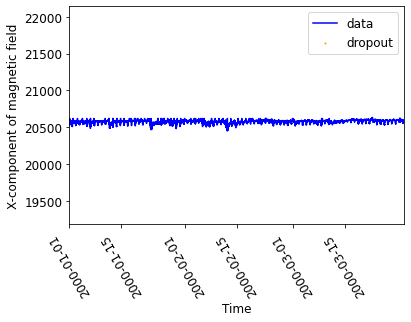

In [20]:
plt.plot(nan_free['Time'], nan_free['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')


plt.scatter(nan_free_2000['Time'][inds_2000], [20400]*inds_len_2000, color='orange', label='dropout', s=1)

plt.xlim([datetime.date(2000, 1, 1), datetime.date(2000, 3, 31)])
plt.xticks(rotation=120)
plt.legend()

Text(0, 0.5, 'X-component of magnetic field')

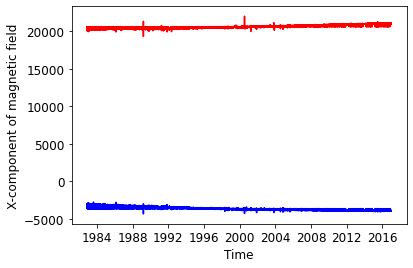

In [21]:
plt.plot(nan_free['Time'], nan_free['X'], label='data', color='red')
plt.plot(nan_free['Time'], nan_free['Y'], label='data2', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

In [22]:
for col in nan_free.columns.to_list():
    print(col, nan_free[col].isna().sum())

Time 0
X 0
Y 0
Z 0
Time_Diff 1
